The purpose of this notebook is to play around with the speaker models

In [1]:
# so we can access classes from parent directory
import sys
sys.path.append("..")

In [124]:
from monroe_data import MonroeData, MonroeDataEntry, Color # for loading in training data
import caption_featurizers                              # for getting caption representations
import color_featurizers                                # for getting color representations
from experiment import FeatureHandler                   # for combining caption and color features

from models import PytorchModel, LiteralSpeaker         # model base that handles training / evaluation
from models import CharacterCaptionGenerator

from functools import partial

In [9]:
# set up dev data to play with
train_data = MonroeData("../data/csv/train_corpus_monroe.csv", "../data/entries/train_entries_monroe.pkl")
dev_data = MonroeData("../data/csv/dev_corpus_monroe.csv", "../data/entries/dev_entries_monroe.pkl")

In [67]:
# set up caption featurizer with same vocab as with training
caption_phi = caption_featurizers.CaptionFeaturizer(tokenizer = caption_featurizers.CharacterTokenizer)
caption_phi.construct_featurizer(train_data)

In [163]:
def wordify(idx_array):
    return "".join([caption_phi.caption_indexer.get_word_from_idx(i) for i in idx_array[0]])


def literal_speaker(value, s0_model, phi, phi_space, space="rgb", display=True):
    """Takes non-normed, either rgb or hsl color and gets the """
    color = Color(*value, space=space)
    
    color_features = phi(color.__dict__[phi_space], space=phi_space) # access color representation using variable name as string
    
    sos = caption_phi.caption_indexer.get_idx_from_word(caption_phi.caption_indexer.SOS)
    eos = caption_phi.caption_indexer.get_idx_from_word(caption_phi.caption_indexer.EOS)
    predictions = s0_model.predict([[[sos, eos], [color_features]]], sample=3, beam_width=5)[0] # only one color-conntext
    print(predictions)
    captions = [wordify([prediction]) for prediction in predictions]
    print(captions)
    if display:
        train_data.display_target(color.rgb_norm, captions[0])
    return captions

# Fourier Speaker

In [126]:
# set up model
model_fourier = LiteralSpeaker(CharacterCaptionGenerator, max_gen_len=40)
model_fourier.init_model(color_in_dim=54, color_dim=50, vocab_size=caption_phi.caption_indexer.size,
                       embed_dim=50, speaker_hidden_dim=100)
model_fourier.load_model("../model/character_literal_speaker.params")

In [164]:
s0_fourier = partial(literal_speaker, s0_model=model_fourier, phi=color_featurizers.color_phi_fourier, 
                     phi_space="hsv_norm")

[array([ 0, 12,  7,  6, 13, 19,  3, 14]), array([ 0, 24,  6, 13, 14]), array([ 0,  7,  3,  5, 14])]
['<sos>orange<eos>', '<sos>yan<eos>', '<sos>red<eos>']
<sos>orange<eos>


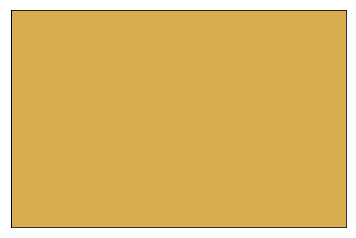

['<sos>orange<eos>', '<sos>yan<eos>', '<sos>red<eos>']

In [165]:
s0_fourier([218,173,79])

[array([ 0,  7,  3,  5, 14]), array([ 0,  7,  3,  5, 17, 23,  2, 14]), array([ 0, 15, 17, 13,  8, 14])]
['<sos>red<eos>', '<sos>redish<eos>', '<sos>pink<eos>']
<sos>red<eos>


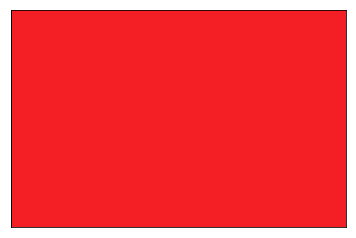

['<sos>red<eos>', '<sos>redish<eos>', '<sos>pink<eos>']

In [166]:
s0_fourier([244,31,36])

In [129]:
for i in range(256):
    print(i, s0_fourier([i, i, i], display=False))

0 <sos>brown<eos>
1 <sos>brown<eos>
2 <sos>brown<eos>
3 <sos>brown<eos>
4 <sos>brown<eos>
5 <sos>brown<eos>
6 <sos>brown<eos>
7 <sos>brown<eos>
8 <sos>brown<eos>
9 <sos>brown<eos>
10 <sos>brown<eos>
11 <sos>brown<eos>
12 <sos>brown<eos>
13 <sos>brown<eos>
14 <sos>brown<eos>
15 <sos>brown<eos>
16 <sos>brown<eos>
17 <sos>brown<eos>
18 <sos>brown<eos>
19 <sos>brown<eos>
20 <sos>brown<eos>
21 <sos>brown<eos>
22 <sos>brown<eos>
23 <sos>brown<eos>
24 <sos>brown<eos>
25 <sos>brown<eos>
26 <sos>brown<eos>
27 <sos>brown<eos>
28 <sos>brown<eos>
29 <sos>brown<eos>
30 <sos>brown<eos>
31 <sos>brown<eos>
32 <sos>brown<eos>
33 <sos>brown<eos>
34 <sos>brown<eos>
35 <sos>brown<eos>
36 <sos>brown<eos>
37 <sos>brown<eos>
38 <sos>brown<eos>
39 <sos>brown<eos>
40 <sos>brown<eos>
41 <sos>brown<eos>
42 <sos>brown<eos>
43 <sos>grey<eos>
44 <sos>grey<eos>
45 <sos>grey<eos>
46 <sos>grey<eos>
47 <sos>grey<eos>
48 <sos>grey<eos>
49 <sos>grey<eos>
50 <sos>grey<eos>
51 <sos>grey<eos>
52 <sos>grey<eos>
53 <sos>grey<

# HSV Speaker

In [83]:
# set up model
model_hsv = LiteralSpeaker(CharacterCaptionGenerator, max_gen_len=40)
model_hsv.init_model(color_in_dim=3, color_dim=50, vocab_size=caption_phi.caption_indexer.size,
                       embed_dim=50, speaker_hidden_dim=100)
model_hsv.load_model("../model/character_literal_speaker_hsv.params")

In [132]:
# partially evaluate the literal_speaker function with the parameters model_hsv requires
s0_hsv = partial(literal_speaker, s0_model=model_hsv, phi=color_featurizers.color_phi_id, 
                     phi_space="hsv_norm")

<sos>red<eos>


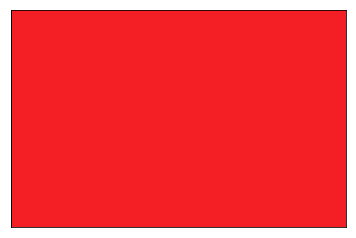

'<sos>red<eos>'

In [133]:
s0_hsv([244,31,36]) # for rgb values (244, 31, 36)

In [134]:
for i in range(256):
    print(i, s0_hsv([i, i, 100], display=False))

0 <sos>blue<eos>
1 <sos>blue<eos>
2 <sos>blue<eos>
3 <sos>blue<eos>
4 <sos>blue<eos>
5 <sos>blue<eos>
6 <sos>blue<eos>
7 <sos>blue<eos>
8 <sos>blue<eos>
9 <sos>blue<eos>
10 <sos>blue<eos>
11 <sos>blue<eos>
12 <sos>blue<eos>
13 <sos>blue<eos>
14 <sos>blue<eos>
15 <sos>blue<eos>
16 <sos>blue<eos>
17 <sos>blue<eos>
18 <sos>blue<eos>
19 <sos>blue<eos>
20 <sos>blue<eos>
21 <sos>blue<eos>
22 <sos>blue<eos>
23 <sos>blue<eos>
24 <sos>blue<eos>
25 <sos>blue<eos>
26 <sos>blue<eos>
27 <sos>blue<eos>
28 <sos>blue<eos>
29 <sos>blue<eos>
30 <sos>blue<eos>
31 <sos>blue<eos>
32 <sos>blue<eos>
33 <sos>blue<eos>
34 <sos>blue<eos>
35 <sos>purple<eos>
36 <sos>blue<eos>
37 <sos>purple<eos>
38 <sos>purple<eos>
39 <sos>purple<eos>
40 <sos>purple<eos>
41 <sos>purple<eos>
42 <sos>purple<eos>
43 <sos>purple<eos>
44 <sos>purple<eos>
45 <sos>purple<eos>
46 <sos>purple<eos>
47 <sos>purple<eos>
48 <sos>purple<eos>
49 <sos>purple<eos>
50 <sos>purple<eos>
51 <sos>purple<eos>
52 <sos>purple<eos>
53 <sos>purple<eos>
54

# RGB Speaker

In [135]:
# set up model
model_rgb = LiteralSpeaker(CharacterCaptionGenerator, max_gen_len=40)
model_rgb.init_model(color_in_dim=3, color_dim=50, vocab_size=caption_phi.caption_indexer.size,
                    embed_dim=50, speaker_hidden_dim=100)
model_rgb.load_model("../model/character_literal_speaker_rgb.params")

In [136]:
# partially evaluate literal speaker function with the parameters model_rgb requires
s0_rgb = partial(literal_speaker, s0_model=model_rgb, phi=color_featurizers.color_phi_id, 
                     phi_space="rgb_norm")

<sos>redish<eos>


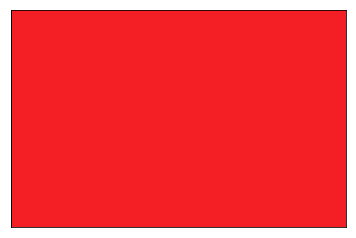

'<sos>redish<eos>'

In [137]:
s0_rgb([244,31,36])